In [0]:
# now we create a quick function to calculate loss based on distance from centroid
def calc_loss(x,y,x_ref,y_ref):
    
    
    # calculate Euclidean distance btw person & centroid
    distance = np.sqrt((((x-x_ref)**2)+((y-y_ref)**2))) 
    
    # refer to the above distance function to determine individual loss
    loss = 1/(1+ np.exp(-distance)) #converts distances to probability distribution
    
    #return distance
    return loss

In [0]:
# this function compares the loss between two groups at a certain percentile level
def compare_loss(group1,group2,percentile):
    select_group = [group1, group2]
    
    percentile_loss = []
    for s in select_group:
        subgroup = [s['min_loss']] # subset the two different groups of interest
        loss_p = np.percentile(subgroup, percentile,interpolation='linear') # find the level of loss at given percentile
        percentile_loss.append(loss_p) # load list with loss
        
    difference = percentile_loss[0]-percentile_loss[1] # find difference between two @ percentile
    
    return np.abs(difference)

In [0]:
#this function calculates the summation of all the individual losses within each cluster for minimizing the objective function
def sum_loss(cluster0, cluster1):
  cluster0_len = len(cluster0['min_loss'])
  cluster1_len = len(cluster1['min_loss'])
  tot = cluster0_len + cluster1_len
  #sums the losses from both clusters
  tot_loss = (cluster0['min_loss'].sum() + cluster1['min_loss'].sum())/tot
  return tot_loss

In [0]:
#this function calculates the subgroup loss constraint for the objective function
def constraint(cluster0, cluster1, percentile):
  cluster0_len = len(cluster0['min_loss'])
  cluster1_len = len(cluster1['min_loss'])
  tot = cluster0_len + cluster1_len
  #calculation of subgroup loss between red and blue
  subgroup_loss_div = compare_loss(cluster0, cluster1 ,percentile)
  #based on the loss function defined, we divide the divergence of the 2 groups' loss by the number of subgroups
  subgroup_div_tot = subgroup_loss_div/2
  #want to minimize this value
  return subgroup_div_tot




In [0]:
# #calculates negative gradient for clusters
# def update_weights(clust0, clust1, lr, centr):
#   x_deriv_0, y_deriv_0 = 0, 0
#   x_deriv_1, y_deriv_1 = 0, 0
#   #total number of points in cluster 0 (points nearest to centroid 0)
#   N_0 = len(clust0['x_coord'])
#   #total number of points in cluster 1 (points nearest to centroid 1)
#   N_1 = len(clust1['x_coord'])
#   ans1_0, ans2_0 = centr[0][0], centr[0][1]
#   ans1_1, ans2_1 = centr[1][0], centr[1][1]

#   for i in range(N_0):

#     #calculate partial derivatives
#     #(e^-d/(1+e^-d)^2)
#     x = clust0['x_coord'][i]
#     y = clust0['y_coord'][i]

#     distance = clust0['min_loss'][i]
#     x_deriv_0 += ((np.exp(-1*distance))* (x-ans1_0))/((1 + np.exp(-1*distance))**2) *distance* lr
#     y_deriv_0 += ((np.exp(-1*distance))*(y/np.sqrt(distance)))/((1 + np.exp(-1*distance))**2)*distance * lr

#   ans1_0 -= (x_deriv_0/float(N_0)) * lr
#   ans2_0 -= (y_deriv_0/float(N_0)) * lr


#   for i in range(N_1):

#     #calculate partial derivatives
#     #(e^-d/(1+e^-d)^2)
#     x = clust1['x_coord'][i]
#     y = clust1['y_coord'][i]

#     distance = clust1['min_loss'][i]
#     x_deriv_1 += ((np.exp(-1*distance))*(x/np.sqrt(distance)))/((1 + np.exp(-1*distance))**2) * lr
#     y_deriv_1 += ((np.exp(-1*distance))*(y/np.sqrt(distance)))/((1 + np.exp(-1*distance))**2) * lr

#   ans1_1 -= (x_deriv_1/float(N_1)) * lr
#   ans2_1 -= (y_deriv_1/float(N_1)) * lr
#   return (ans1_0, ans2_0), (ans1_1, ans2_1)





In [0]:
#calculates negative gradient for clusters
def update_weights(clust0, clust1, lr, centr):
  x_deriv_0, y_deriv_0 = 0, 0
  x_deriv_1, y_deriv_1 = 0, 0
  #total number of points in cluster 0 (points nearest to centroid 0)
  N_0 = len(clust0['x_coord'])
  #total number of points in cluster 1 (points nearest to centroid 1)
  N_1 = len(clust1['x_coord'])
  #updated centroid coordinates 
  new_centr_x0, new_centr_y0 = centr[0][0], centr[0][1]
  new_centr_x1, new_centr_y1 = centr[1][0], centr[1][1]

  
  for i in range(N_0):
    #calculate partial derivatives
    #(e^-d/(1+e^-d)^2)

    x = clust0['x_coord'][i]
    y = clust0['y_coord'][i]

    distance = clust0['min_loss'][i]

    numerator_x = np.exp(-1*distance)*(x-centr[0][0])
    denominator_x = (1 + np.exp(-1*distance)) * distance
    grad_x = numerator_x/denominator_x

    numerator_y = np.exp(-1*distance)*(y-centr[0][1])
    denominator_y = (1 + np.exp(-1*distance)) * distance
    grad_y = numerator_y/denominator_y

    x_deriv_0 += grad_x
    y_deriv_0 += grad_y
  
  loss_grad_x = x_deriv_0/float(N_0)
  loss_grad_y = y_deriv_0/float(N_0)


  new_centr_x0 -= (loss_grad_x) * lr
  new_centr_y0 -= (loss_grad_y) * lr


  for i in range(N_1):

    #calculate partial derivatives
    #(e^-d/(1+e^-d)^2)
    x = clust1['x_coord'][i]
    y = clust1['y_coord'][i]

    distance = clust1['min_loss'][i]

    numerator_x = np.exp(-1*distance)*(x-centr[1][0])
    denominator_x = (1 + np.exp(-1*distance)) * distance
    grad_x = numerator_x/denominator_x

    numerator_y = np.exp(-1*distance)*(y-centr[1][1])
    denominator_y = (1 + np.exp(-1*distance)) * distance
    grad_y = numerator_y/denominator_y

    x_deriv_1 += grad_x
    y_deriv_1 += grad_y
  
  loss_grad_x = x_deriv_1/float(N_1)
  loss_grad_y = y_deriv_1/float(N_1)


  new_centr_x1 -= (loss_grad_x) * lr
  new_centr_y1 -= (loss_grad_y) * lr
  
  return (new_centr_x0, new_centr_y0), (new_centr_x1, new_centr_y1)





In [0]:
#updates centroid locations based on gradient descent and loss constraint
def update(clust0, clust1, lr, centroids,loss, df):
  c0_group0 = clust0[clust0['group']==0] 
  c0_group1 = clust0[clust0['group']==1] 

  c1_group0 = clust1[clust1['group']==0] 
  c1_group1 = clust1[clust1['group']==1] 
  
  subgroup_loss = constraint(group0, group1, .5)
  L = .09
  while subgroup_loss < L:
    print('subgroup loss: ', subgroup_loss)
    old_loss = loss
    temp_centroids = centroids
    temp = update_weights(clust0, clust1, .5, centroids)
    print('temp ', temp)
    temp_centroids[0] = temp[0]
    temp_centroids[1] = temp[1]
    df = assign_cluster(df, temp_centroids)
    clust0 = df[df['min_centr'] == 0]
    clust0 = clust_0.reset_index()
    #all points clustered around centroid 1
    clust1 = df[df['min_centr'] == 1]
    clust1 = clust_1.reset_index()
    group_0 = clust0[clust0['min_centr']==0]
    group_1 = clust0[clust1['min_centr']==1]
    loss = sum_loss(clust0, clust1)
    subgroup_loss = constraint(group0, group1, .5)
    # print(subgroup_loss)
    if loss < old_loss:
      centroids[0] = temp[0]
      centroids[1] = temp[1]
    else:
      return centroids




In [0]:
def assign_cluster(df, centroids):
  for i in centroids.keys():
    #loss based on euclidean distance for each individual point compared to both centroids
    #stored in dataframe
    df['loss_from_{}'.format(i)] = calc_loss(df['x_coord'], df['y_coord'], centroids[i][0], centroids[i][1])

  centroid_dist_col = ['loss_from_{}'.format(i) for i in centroids.keys()]

  #df column which holds the value of the closest centroid for each point
  df['min_centr'] = df.loc[:, centroid_dist_col].idxmin(axis=1)
  df['min_centr'] = df['min_centr'].map(lambda x: int(x.lstrip('loss_from_')))
  
  #value of loss calculated from sigmoid in calc_loss function for individual loss
  df['min_loss'] = df[['loss_from_0','loss_from_1']].min(axis=1)
  #color of the closest centroid to each point
  df['color'] = df['min_centr'].map(lambda x: color_map[x])
  return df




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


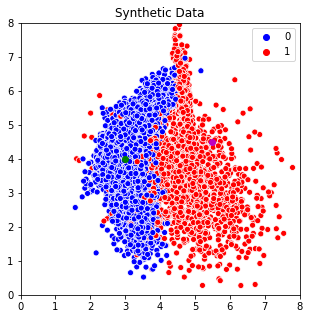

In [9]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



# Generate Imbalanced Synthetic Data
X,y = make_classification(n_samples=10000, shift=4 ,n_features=2,n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=.8,flip_y=0,weights=[0.75,0.25], random_state=55)

#create dataframe to hold x and y coordinates
df = pd.DataFrame({
    'x_coord': X[:,0],
    'y_coord': X[:,1]
})

#red vs blue points
#if group = 0, then the point is in the blue group
# if group = 1, then the point is in the red group
df['group'] = y


# np.random.seed(42)

#arbitrarily picked random k (number of centroids)
k = 2

#randomly initialized centroid x and y coordinates (in real data we will actually have these coordinates)
centroids = {
    0: [3,4],
    1: [5.5, 4.5]
}

#colors for centroids
color_map = {0: 'g', 1: 'm'}


#plot synthetic data
fig = plt.figure(figsize=(5,5))
ax = sns.scatterplot(X[:,0],X[:,1],hue=y, palette=['blue','red'])

for i in centroids.keys():
  plt.scatter(centroids[i][0], centroids[i][1], color=color_map[i])
df = assign_cluster(df, centroids)
df
plt.xlim(0, 8)
plt.ylim(0, 8)
ax.set_title("Synthetic Data");
plt.show()



In [26]:
df = assign_cluster(df, centroids)
df

,x_coord,y_coord,group,loss_from_0,loss_from_1,min_centr,min_loss,color
0,4.677735,6.148117,1,0.938524,0.863169,1,0.863169,m
1,3.415488,3.497728,0,0.657429,0.909952,0,0.657429,g
2,4.865680,1.781136,1,0.947797,0.942238,1,0.942238,m
3,3.289023,2.337503,0,0.843887,0.956595,0,0.843887,g
4,3.585084,2.673353,0,0.809990,0.933796,0,0.809990,g
...,...,...,...,...,...,...,...,...
9995,3.194054,2.488914,0,0.821053,0.955204,0,0.821053,g
9996,2.959767,3.050791,0,0.721128,0.949052,0,0.721128,g
9997,3.044121,4.304612,0,0.576346,0.921561,0,0.576346,g
9998,3.361827,1.942454,0,0.889841,0.965566,0,0.889841,g


In [0]:
#all points clustered around centroid 0
clust_0 = df[df['min_centr'] == 0]
clust_0 = clust_0.reset_index()
#all points clustered around centroid 1
clust_1 = df[df['min_centr'] == 1]
clust_1 = clust_1.reset_index()

#all points in group 0 (blue points)
group_0 = df[df['group']==0]
group_0 = group_0.reset_index()

#all points in group 1 (red points)
group_1 = df[df['group']==1]
group_1 = group_1.reset_index()

#blue = 0
#red = 1

#dictionary storing total red and blue points associated with centrioid 0
clust_0_groups = {0: clust_0.loc[clust_0['group']==0, 'group'].count(), 
                  1: clust_0.loc[clust_0['group']==1, 'group'].count()}

#total number of points in cluster around centroid 0
clust0_tot = clust_0_groups[0] + clust_0_groups[1]

#dictionary storing total red and blue points associated with centrioid 1
clust_1_groups = {0: clust_1.loc[clust_1['group']==0, 'group'].count(), 
                  1: clust_1.loc[clust_1['group']==1, 'group'].count()}

#total number of points in cluster around centroid 1
clust1_tot = clust_1_groups[0] + clust_1_groups[1]


In [28]:
#Total Percentages of Red and Blue in population 
red_percent = (clust_0_groups[1] + clust_1_groups[1])/(clust0_tot + clust1_tot)
blue_percent = (clust_0_groups[0] + clust_1_groups[0])/(clust0_tot + clust1_tot)

print('red: ', red_percent)
print('blue: ', blue_percent)

red:  0.25
blue:  0.75


In [29]:
#Total Percentages Per Cluster
#Cluster 0 red percentage
clust0_percent_red = clust_0_groups[1]/clust0_tot

#Cluster 0 blue percentage
clust0_percent_blue = clust_0_groups[0]/clust0_tot

print("Cluster 0: ")
print('red: ', clust0_percent_red)
print('blue: ', clust0_percent_blue)

#Cluster 1 red percentage
clust1_percent_red = clust_1_groups[1]/clust1_tot

#Cluster 0 blue percentage
clust1_percent_blue = clust_1_groups[0]/clust1_tot

print("Cluster 1: ")
print('red: ', clust1_percent_red)
print('blue: ', clust1_percent_blue)


#new dataframe for the percentages of each group in both clusters and the total population
color_rates = pd.DataFrame({'color': ['red', 'blue'],
                            'population_level': [red_percent, blue_percent],
                            'cluster_0': [clust0_percent_red, clust0_percent_blue],
                            'cluster_1': [clust1_percent_red, clust1_percent_blue]})
color_rates

Cluster 0: 
red:  0.05573474390401238
blue:  0.9442652560959877
Cluster 1: 
red:  0.9195197865718097
blue:  0.08048021342819031


,color,population_level,cluster_0,cluster_1
0,red,0.25,0.055735,0.91952
1,blue,0.75,0.944265,0.08048


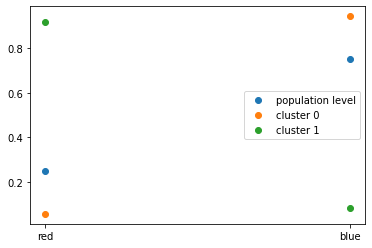

In [22]:
#plot representing the percentage differences in red/blue group representation on population/cluster level
plt.scatter(color_rates['color'], color_rates['population_level'],label='population level')
plt.scatter(color_rates['color'],color_rates['cluster_0'],label = 'cluster 0')
plt.scatter(color_rates['color'],color_rates['cluster_1'],label = 'cluster 1')
plt.legend()

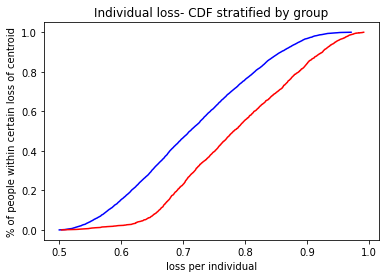

In [23]:
#CDF for all blue and red points
#cdf for group 0 (all blue points)
sorted_data_0 = group_0.sort_values(by=['min_loss'])
sorted_len_0 = len(sorted_data_0['min_loss'])
yvals_0 = np.arange(sorted_len_0)/float(sorted_len_0-1)

#cdf for group 1 (all red points)
sorted_data_1 = group_1.sort_values(by=['min_loss'])
sorted_len_1 = len(sorted_data_1['min_loss'])
yvals_1 = np.arange(sorted_len_1)/float(sorted_len_1-1)


plt.plot(sorted_data_0['min_loss'], yvals_0, 'b')
plt.plot(sorted_data_1['min_loss'], yvals_1, 'r')

plt.xlabel('loss per individual')
plt.ylabel('% of people within certain loss of centroid')
plt.title('Individual loss- CDF stratified by group')
plt.show()


#blue = 0 (blue points)
#red = 1 (red points)

In [24]:
df = assign_cluster(df, centroids)
df
loss = sum_loss(group_0, group_1)
loss
update(clust_0, clust_1, .01, centroids,loss,df )

subgroup loss:  0.011407552446921931
temp  ((2.9999899441307645, 4.000002579528498), (5.500099260003685, 4.500029141041748))


{0: (2.9999899441307645, 4.000002579528498),
 1: (5.500099260003685, 4.500029141041748)}

In [25]:
centroids

{0: (2.9999899441307645, 4.000002579528498),
 1: (5.500099260003685, 4.500029141041748)}